# Run Single Simulation of Ising Model Using Glaubber Dynamics

Simulate Ising model using Glaubber Dynamics Methodology (https://en.wikipedia.org/wiki/Glauber_dynamics)

In [1]:
from nxdynamics.src.graphs.complete_graph import CompleteGraph
from nxdynamics.src.time_evolution.ising_model.glaubber import GlaubberDynamics

import numpy as np

# Parameters of simulation
size = 1000
beta = np.inf
initial_mean = -0.4
time = 100

# Run simulation
inital_spins = CompleteGraph(size=size, mean=initial_mean)
sim = GlaubberDynamics(graph=inital_spins,
                       beta=beta)
sim.run_simulation(total_steps=time,
                   record_sweep=True)

100%|██████████| 100/100 [01:08<00:00,  1.47it/s]


Our final magnetization is -0.446


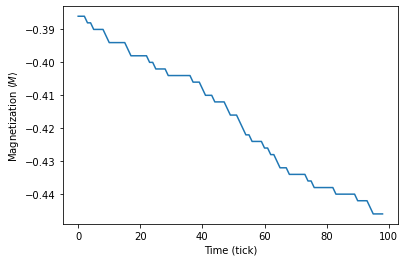

In [5]:
import matplotlib.pyplot as plt

magnetization = []

for i in range(1,time):
    spins = sim.data[i]['node_value']
    magnetization_at_i = np.sum(spins) / size

    magnetization.append(magnetization_at_i)

final_magnetization = np.sum(sim.data[time]['node_value']) / size
print(f"Our final magnetization is {final_magnetization}")

plt.plot(magnetization)
plt.xlabel('Time (tick)')
plt.ylabel(r"Magnetization $\langle M \rangle$")
plt.show()

# Run Averaged Glaubber Dynamics

We want to check this simulation exhibits a phase transition.

This occurs at temperature $T_C$ s.t.
$$ T_C = q J$$

Where $q$ are the number of neighbor sites, and $J$ is the coupling strength.

In [9]:
from tqdm import tqdm

# Parameters of simulation
size = 30 # Number of spins
initial_mean = 0
time = 1000

trials_per_temp = 100
temp_range = np.linspace(0, 5, 5)


all_mag = []
for temp in tqdm(temp_range):
    beta = 1/np.float32(temp)
    mag_at_temp = []
    for trial in range(trials_per_temp):
        inital_spins = CompleteGraph(size=size, mean=initial_mean)
        sim = GlaubberDynamics(graph=inital_spins,
                               beta=beta)
        sim.run_simulation(total_steps=time,
                           record_sweep=False,
                           record_final=True)

        final_magnetization = np.sum(sim.data[1]['node_value']) / size
        mag_at_temp.append(final_magnetization)
    all_mag.append(mag_at_temp)

/var/folders/wd/zr_by8q96891mxc_506sm9sr0000gn/T/ipykernel_22129/1496963281.py:12: RuntimeWarning: divide by zero encountered in true_divide
  beta = 1/np.float32(temp)
 77%|███████▋  | 768/1000 [00:00<00:00, 4876.81it/s]


KeyboardInterrupt: 

In [2]:
import numpy as np
import random

node_ids = np.random.randint(low=0, 
                                    high=100,
                                    size=100)

# Run Glaubber algorithm
for node_id in node_ids:
    print(node_id)

78
94
69
37
80
14
70
13
75
33
20
75
19
1
90
63
86
56
71
53
37
31
82
72
70
75
6
31
11
0
37
41
75
5
56
91
20
7
76
41
74
15
69
23
38
31
98
52
20
45
45
37
79
28
71
9
24
22
21
39
41
9
10
69
89
84
72
95
19
63
77
9
79
49
20
7
91
50
61
68
21
27
72
92
85
76
97
71
33
86
92
56
38
76
88
36
58
22
72
34


In [1]:
%%timeit
node_id = random.randrange(0, 100)

NameError: name 'random' is not defined